# Fraud Detection Machine Learning on Enron Enteprise Dataset

## Abstract
All through history, corruption and fraud has been present. It is known cases in which one book author published its book in the name of a more famous one. The fraud was detected by the use of Machine Learning. In such contexts, it is difficult, if not impossible, to find efficient patterns without making use of Artificial Inteligence (AI). And since Machine Learning has become a buzzword and has proven its efficiency. This work explores a subfield of AI called Supervised Classificaton. 

This paper covers Naive Bayes, Support Vector Mahcine (SVM), and Decision Tree supervised classification algorithms, working on a pre-processed list of email texts based on the Enron Corporation dataset. As such, they will predict email authors by their writting style and content of words.

The purpose of this work is to understand complexity, strengths, weaknessess and how to improve accuracy and performance of the algorithms mentioned above.

It is holped this study will guide practicioners to manage these techniques to reach their expected results.

**Keywords:** Machine Learning, Classifier, Support Vector Machines, Gaussian Naive Bayes, Decision Trees, GridSearch.

## Introduction
Enron was founded in 1985 through the merger of an Omaha-based natural gas pipeline company (InterNorth) and a Texas pipeline company (Houston Natural Gas). Within a decade, Enron had evolved beyond energy trading, become a conglomerate that was also actively involved in the area of metals, pulps and paper, broadband assets, water plants internationally and also traded extensively in financial markets for the same products and services (Healy & Palepu, 2003). This massive expansion generated revenues of $ 4.6 billion in 1990, to revenues of $101 billion in 2000. That, in turn, made Enron the seventh largest company in the United States, bigger than IBM or Sony. Enron executives landed on the covers of business magazines, and the company was hailed as a model for success and innovation \cite{davis2007social}.

In order to keep appeasing the investors to create a consistent profiting situation in the company, Enron traders were pressured to forecast high future cash flows and low discount rate on the long-term contract with Enron. It was also common to hide the debt since high debt levels would lower the investment grade and trigger 
banks to recall money. The lack of truthfulness by management about the health of the company, according to Kirk Hanson, the executive director of the Markkula Center for Applied Ethics was the cause of Enron’s bankruptcy \cite{li2010case}.

At the end of 2001, the company's corruption emmerged as a great fraud scandal and soon after this the company filed for bankruptcy.  After that, many rules and regulations were changed to be able to audit and prenvent cases like this one. 

This scandal brought into question the accounting practices and activities of many corporations in the United States and many rules and regulations were changed to be able to audit and prenvent cases like this one.  And many started to wonder how such a powerful business disintegrated so quickly and how it managed to fool the regulators for so long.

Due to this interesting case, the company's financial and emails data became public for studies purpose. And this case became a point of interest for machine learning analysis because it could assist in finding solutions on how to prevent similar situations to happen. 

## Data Source
The original dataset is available at https://www.cs.cmu.edu/~./enron, and it was collected and prepared by the CALO Project, and contains financial data and text features, that were extracted from emails comprised of 146 users with 21 features each. 

For the experiments in this paper though, two other datasets will be used as the data sources: **word_data.pkl** corresponding to the **features**, and **email_authors.pkl** to the **labels**. They were created  by Katie Malone for Udacity machine learning training course, and represent 8.000 emails per user, belonging to two users: Chris and Sara. It is not entirely clear  how data was developed, and not easy to understand how contents are linked by simply opening the files.

## Related Works

This research is based on the instructions presented et al. \cite{Udacity}, which covers several machine learning techniques.
Degis et al. \cite{mdegis} presents an code develoments for training classifiers to identify authors by emails, also based on Udacity Training Course.

## Methodology
Three different classifiers will be trainned to predict autors emails by their word content and style, using scikit-lean library \cite{scikit}.  

For performing the experiments, estimators will have their parameters tunned by the use of scikit-learn GridSearchCV library \cite{gsearch}, that considers all parameter combinations and provide outputs of their scores. Each experiment can be executed against only a portion or full dataset. They are represented by two running code cells (for each algorithm). Partial dataset is intended to speed up results so as to focus on finding the parameters values combinations, while fulll dataset is meant to verify how well estimators perform in a larger scale.

###   SVM
Support Vector Machine can work with classification or regression, but it is mostly applied to classification. While Support Vectors are the co-ordinates of individual observation, Support Vector Machine is a frontier which best segregates two classes. It has a feature that igores the outliers and tend to be quite robust with them.<br>
**C:** controls the tradeoff between smooth decision boundary and classification training points correctly. In theory, a large value of C means that you will get more training points correctly.<br>
**gamma:** defines how far a the influence of a single training example reaches. If gamma has a low value, every point has a far reach. If gamma has a high value, each training example has a close reach. High value might make the decision boundary less linear, for it will be closer to training points.<br>
**kernel** parameter can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
GridSearch will make testes making combinations with different parameter and values: kernel: rbf and linear
gamma: 1e-3, 1e-4, C: 1, 10, 100, 1000


Number of trained emails for Chris: 7936
Number of trained emails for Sara: 7884

Processing SVM with GridSearchCV and Reduced Dataset...

Training time: 0.495 s
Predicting time: 0.057 s

Number of Predicted emails for Chris 1012
Number of Predicted emails for Sara 746


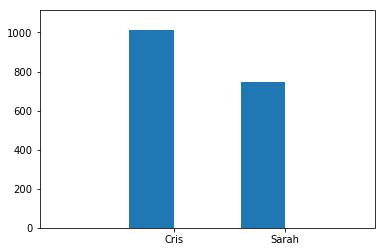

Best Param: {'kernel': 'linear', 'C': 10}
Best Avarage Score: 0.917721518987


In [5]:
# RUN CODE WITH REDUCED DATASET
%run ../dev/svm_gridsearch.ipynb

In [ ]:
# RUN CODE WITH FULL DATASET (AFTER MORE THAN TWO HOURS, IT WAS STILL RUNNING AND DIDN'T DISPLAY RESULTS)
%run ../dev/svm_gridsearch-fulldataset.ipynb

###  GaussianNB (Naive Bayes)
Naive Bayes,based on Bayes’ Theorem, works with the assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. It uses Posterior Probability, giving the rank occurance provided text. In order words, it will be trained with frequent texts(features) used by Chris and Sarah(labels), and it will calculate the probabily and determine if each test email is from Chris or Sara.

It is possible to work with parameters, similarly to SVM, but parameter tune for this classifier makes no changes in results. As such, GridSearchCV is not applied to this scenario.

In [3]:
# RUN CODE WITH REDUCED DATASET
%run ../dev/bayes.ipynb


Number of trained emails for Chris: 7936
Number of trained emails for Sara: 7884

Processing GaussianNB with Reduced Dataset...

Training time: 0.002 s
Predicting time: 0.008 s

Total Accuracy: 0.943117178612


In [ ]:
# RUN CODE WITH FULL DATASET
%run ../dev/bayes-fulldataset.ipynb

###  Decision Trees
Decision trees work with classification or regression models, and it breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. The final outcome is a tree with decision nodes and leaf nodes.

GridSearchCV will be instatiate with the tree estimator, the parameters below and will make the predictions:
parameters = {"criterion": ["gini", "entropy"],"min_samples_split": [2, 10, 20],"max_depth": [None, 2, 5, 10],
"min_samples_leaf": [1, 5, 10],"max_leaf_nodes": [None, 5, 10, 20],              }


Number of trained emails for Chris: 7936
Number of trained emails for Sara: 7884

Processing Decision Tree with GridSearchCV and Reduced Dataset...

Training time: 3.648 s
Predicting time: 0.001 s

Number of Predicted emails for Chris 1017
Number of Predicted emails for Sara 741


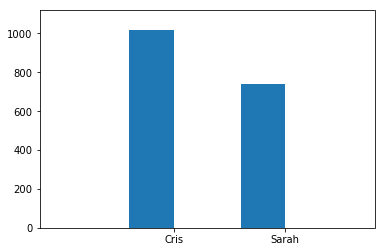

Best Param: {'min_samples_split': 20, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
Best Avarage Score: 0.79746835443


In [4]:
# RUN CODE WITH REDUCED DATASET
%run ../dev/decitionTree_gridsearch.ipynb

In [ ]:
# RUN CODE WITH FULL DATASET (IT TAKES ALMOST ONE HOUR TO DISPLAY RESULTS)
%run ../dev/decitionTree_gridsearch-fulldataset.ipynb

## Summury of Results
This paper contribution was centered in an automated way to tune paramenters through GridSearch, rather than doing manually and traying to guess best combinations. 

#### Analysis with Reduced DataSet:
With regards to performance, all of experiments were fast, since dataset was reduced to 1%.
GridSearch presented best parameter ('min_samples_split': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5) for Decison tree with a bad accuracy: around 0.80379.
GaussianNB was the only classifier to work without paramenters tune in GridSearch, however, it presented the best accurace: around 0.943117178612
GridSearch presented best parameter (kernel:rbf, C:1000, gamma: 0.001) for SVM scoring: 0.91772
In this scenario, GaussianNB was the simplest and most efficient.

#### Analysis with Full DataSet:
SVM experiment with combination of params and full dataset either was still running after more than two hours or had the screen fronzen and did not display any output in more than one attempt. It usually works very well in complicated domains but it doesn't perform well in very large datasets, for it can become slow and prone to overfitting. At this time, results could not be recorded.
GaussianNB presented a impressive performance in the large dataset, and within less than 8 seconds return the high score of 0.973265073948. That was somehow expected, since it is not working with combinations of parameters. But still, it is easy to implement, efficient and performatic, but it can break for some phrases for considering the words individually. 
Decision Tree experiment was with the combination of params in a full dataset reached the best score 0.979393173198. On the other hand, it was slow and it took almost one hour to display the results. 

**Conclusion:**
According to these experiemtns, results suggests that GaussianNB (Naive Bayes) and Decision Tree would be great options to work with larger datasets and meet good accuarcy. GaussianNB was much superior with regards to performance, but Decision Tree had a slight better accuracy. 

And due to the lack of performance, SVM is allegedly not a good option for working with a large dataset like the one presented in this paper.